# **Text Normalization using NLTK library**





---



**Text Normalization** is the process of transforming a text into some 
predefined standard form, and could consist of several tasks

The aim of this notebook is to show the fundamental operations for processing your text. For this aim, the notebook is divided into 5 sections:

*   Corpus loading
*   Tokenization
*   Lemmatization
*   Stemming
*   Corpus statistics


## **Corpus Loading**
A **corpus** (plural corpora), is a body of utterances, as words or 
sentences, assumed to be representative of and used for lexical, 
grammatical, or other linguistic analysis

Let us suppose that we want to work with the Gutenberg corpus.
To work with NLTK library, first download its resources.


In [ ]:
import nltk
nltk.download('gutenberg', quiet=True)
nltk.download('punkt', quiet=True)  # for gutenberg.sents()
nltk.download('stopwords', quiet=True)


True


Then, to load a text, just import the downloaded corpus into your environment.

In [ ]:
from nltk.corpus import gutenberg

# print the fileids of the Gutenberg corpus
print(f"fileids:  {gutenberg.fileids()}")

# print the number of texts in Gutenberg corpus
print(f"number of texts in corpus: {len(gutenberg.fileids())}")

fileids:  ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
number of texts in corpus: 18


A corpus can be loaded as a raw text or as word-splitted text or as sentence-splitted text, respectively using `raw()`, `words()`,`sents()` functions of a corpus in NLTK library.

Let us suppose that we want to load Shakespeare's Macbeth as a raw text. We use the `raw()` function of a corpus.

In [ ]:
# load the Shakespeare's Macbeth from the Gutenberg corpus as raw text
raw_macbeth = gutenberg.raw('shakespeare-macbeth.txt')

# print first 1000 characters of Shakespeare's Macbeth.
print(raw_macbeth[:1000])

[The Tragedie of Macbeth by William Shakespeare 1603]


Actus Primus. Scoena Prima.

Thunder and Lightning. Enter three Witches.

  1. When shall we three meet againe?
In Thunder, Lightning, or in Raine?
  2. When the Hurley-burley's done,
When the Battaile's lost, and wonne

   3. That will be ere the set of Sunne

   1. Where the place?
  2. Vpon the Heath

   3. There to meet with Macbeth

   1. I come, Gray-Malkin

   All. Padock calls anon: faire is foule, and foule is faire,
Houer through the fogge and filthie ayre.

Exeunt.


Scena Secunda.

Alarum within. Enter King Malcome, Donalbaine, Lenox, with
attendants,
meeting a bleeding Captaine.

  King. What bloody man is that? he can report,
As seemeth by his plight, of the Reuolt
The newest state

   Mal. This is the Serieant,
Who like a good and hardie Souldier fought
'Gainst my Captiuitie: Haile braue friend;
Say to the King, the knowledge of the Broyle,
As thou didst leaue it

   Cap. Doubtfull it stood,
As two spent Swimmers, t

## **Corpus Statistics (for Gutenberg Corpus)**
In this Section, we briefly give a look to the Gutenberg corpus from a statistical point of view.

So, we will compute some statistics about the text in the Gutenberg corpus, and then, we will verify if Zipf's Law holds for the Gutenberg corpus.

### **Simple statistics**
Let us suppose that we want to know some statistics about Gutenber corpus, like number of chars per word, number of words per sentence, number of occurrences of unique words. 

The following code does this job.

In [ ]:
import pandas as pd

# calculate total number of characters for each text of the corpus
num_chars = [len(gutenberg.raw(fileid)) for fileid in gutenberg.fileids()]

# calculate total number of words for each text of the corpus
num_words = [len(gutenberg.words(fileid)) for fileid in gutenberg.fileids()]

# calculate total number of senteces for each text of the corpus
num_sents = [len(gutenberg.sents(fileid)) for fileid in gutenberg.fileids()]

# create a DataFrame for the Gutenberg corpus
gutenberg_df = pd.DataFrame(
    {
        'chars_per_word': [round(nc/nw) for nc, nw in zip(num_chars, num_words)], 
        'words_per_sent': [round(nw/ns) for nw, ns in zip(num_words, num_sents)],
    }, 
    index=list(gutenberg.fileids())
)

# print the dataframe
gutenberg_df


,chars_per_word,words_per_sent
austen-emma.txt,5,25
austen-persuasion.txt,5,26
austen-sense.txt,5,28
bible-kjv.txt,4,34
blake-poems.txt,5,19
bryant-stories.txt,4,19
burgess-busterbrown.txt,4,18
carroll-alice.txt,4,20
chesterton-ball.txt,5,20
chesterton-brown.txt,5,23


Let us suppose that we want to know the most occuring words in a text like Shakespeare's Macbeth. 

First, we load Macbeth words using `words()` function and then we just use the function `most_common()` of a _FreqDist_ object, created passing Macbeth words.


In [ ]:
from nltk import FreqDist

# load the Shakespeare's Macbeth from the Gutenberg corpus as sequence of word tokens
macbeth_words = gutenberg.words('shakespeare-macbeth.txt')

# create a FreqDist object starting from the Macbeth's words
fd = FreqDist(macbeth_words)

# print the top 100 common words in Shakespeare's Macbeth
print(fd.most_common(100))

[(',', 1962), ('.', 1235), ("'", 637), ('the', 531), (':', 477), ('and', 376), ('I', 333), ('of', 315), ('to', 311), ('?', 241), ('d', 224), ('a', 214), ('you', 184), ('in', 173), ('my', 170), ('And', 170), ('is', 166), ('that', 158), ('not', 155), ('it', 138), ('Macb', 137), ('with', 134), ('s', 131), ('his', 129), ('be', 124), ('The', 118), ('haue', 117), ('me', 111), ('your', 110), ('our', 103), ('-', 100), ('him', 90), ('for', 82), ('Enter', 80), ('That', 80), ('this', 79), ('he', 76), ('What', 74), ('To', 73), ('so', 70), ('all', 67), ('thou', 63), ('are', 63), ('will', 62), ('Macbeth', 61), ('thee', 61), ('but', 60), ('But', 60), ('on', 59), ('they', 58), ('Macd', 58), ('we', 57), ('their', 57), ('vs', 57), ('King', 55), ('as', 55), (';', 52), ('vpon', 51), ('th', 51), ('do', 51), ('yet', 50), ('Rosse', 49), ('shall', 48), ('them', 48), ('no', 48), ('Lady', 48), ('from', 47), ('t', 47), ('thy', 46), ('at', 45), ('more', 45), ('what', 44), ('which', 44), ('st', 42), ('would', 42),

### **Zipf's Law**
**Zipf's Law** states that the frequency of a token in a text is directly proportional to its rank or position in the sorted list. This law describes how tokens are distributed in languages: some tokens occur very frequently, some occur with intermediate frequency, and some tokens rarely occur.

In order to verify if Zipf's Law holds for the Gutenberg Corpus, first we need to compute word frequencies of the words occouring in the texts. Then, we need to generate a rank-frequency pair for each token and plot rank vs frequency on a log-log plot.

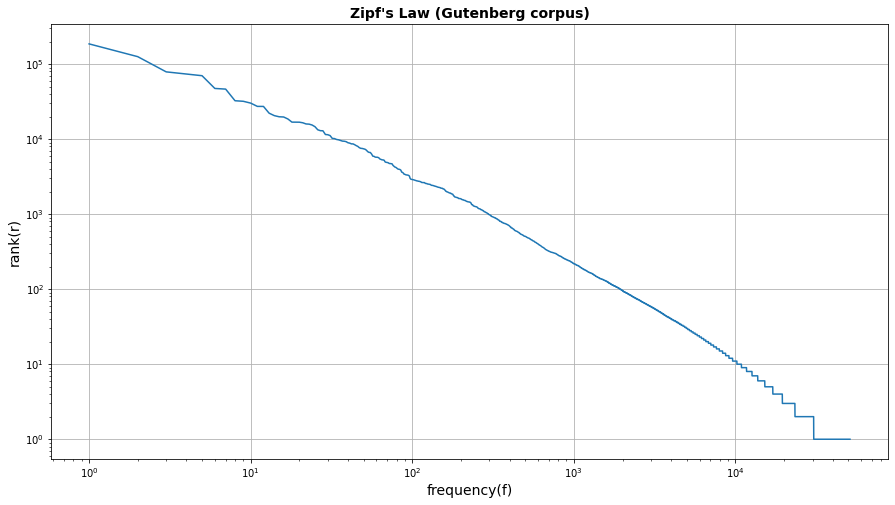

In [ ]:
from nltk import FreqDist         # for computing word frequency distributions
import matplotlib.pyplot as plt   # for data visualization
plt.rcParams["figure.figsize"] = (15,8)

# compute word frequencies
fd = FreqDist()
for text in gutenberg.fileids():
  for word in gutenberg.words(text):
    fd[word] += 1

# Initialize two empty lists which will hold our ranks and frequencies
ranks, freqs = [], []

# Generate a (rank, frequency) point for each counted token and append to the respective lists.
# Note that the iteration over fd is automatically sorted.
for rank, word in enumerate(fd):
  ranks.append(rank+1)
  freqs.append(fd[word])

# Zipf's Law
# Plot rank vs frequency on a log-log plot and show the plot
plt.loglog(ranks, freqs)
plt.title('Zipf\'s Law (Gutenberg corpus)', fontsize=14, fontweight='bold')
plt.xlabel('frequency(f)', fontsize=14)
plt.ylabel('rank(r)', fontsize=14)
plt.grid(True)
plt.show()

Looking at the plot, we could say that the law holds for the Gutenberg corpus because there are a lot of words less frequent than other few words very frequent. 

### **Herdan's Law**

The **Herdan's Law** states that the vocabulary size grows faster than square root of the number of word tokens.

Let $N$ be the  number of tokens (i.e., number of running words) and let $V$ be the vocabulary, which contains the set of unique words of our corpus and let $|V|$ be the size of the vocabulary $V$, the Herdan's Law is expressed by:

$$ |V| = kN^{\beta}$$

where $ \beta $ is a constant $(0.68 \le \beta \le 0.75)$

The following code shows the curve of the Herdan's Law, compared to the curve of the square root function, both computed for the number of running words of each document in the Gutenberg Corpus.

Computing Frequency Distributions...: 100%|██████████| 18/18 [00:07<00:00,  2.26it/s]


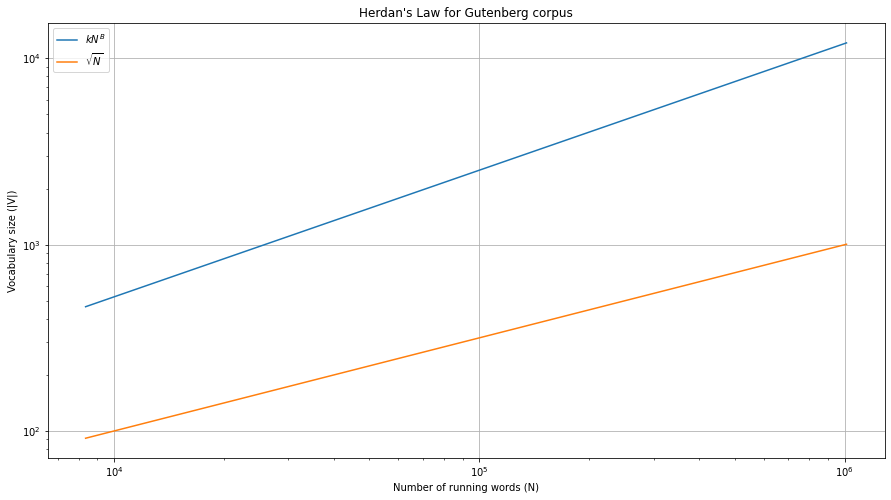

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from nltk import word_tokenize
from nltk.probability import FreqDist
from tqdm import tqdm

# get a FreqDist object for each document in Gutenberg corpus
fdists = []
for fileid in tqdm(list(gutenberg.fileids()), desc="Computing Frequency Distributions..."):
  fdist = FreqDist()
  for sent in gutenberg.sents(fileids=fileid):
    for word in sent:
      fdist[word.lower()] += 1
  fdists.append(fdist)

# get the number of running words for each document in Gutenberg corpus, sorted in ascending order
running_words = np.array([fdist.N() for fdist in fdists])
running_words = np.sort(running_words)

# create a figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# choose a proper value of the costant beta (between 0.68 and 0.75)
beta = 0.68

# fix the constant k at 1
k = 1

# plot the herdan curve
herdan_line, = ax.plot(running_words, np.power(k * running_words, beta), label="$kN^{B}$")

# plot the square root curve
sqrt_line, = ax.plot(running_words, np.sqrt(running_words), label="$\sqrt{N}$")
ax.grid()

# plot settings
ax.set_title("Herdan's Law for Gutenberg corpus")
ax.set_ylabel("Vocabulary size (|V|)")
ax.set_xlabel("Number of running words (N)")
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend();

**Conclusion**

The Herdan's Law holds for the Gutenberg Corpus.

## **Tokenization**
**Sentence tokenization** stands for splitting sentences from a corpus, while
**Word tokenization** stands for splitting words from a sentence.

Notice that '*punkt*' package from NLTK data is needed.

In NLTK, these jobs could be done using `sent_tokenize()` and `word_tokenize()` functions.

Here we see an example of word tokenization starting from Shakespeare's Macbeth.

In [ ]:
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize

# get the set of unique word tokens in Macbeth
macbeth_words = list(set(word.lower() for word in word_tokenize(raw_macbeth)))

# print the set of unique word tokens in Macbeth
print(macbeth_words)


['cracks', 'cosine', 'single', 'goe', 'naught', 'groomes', 'come', 'cherubin', 'fiends', 'crew', 'ghost', 'shed', 'entry', 'saying', 'flawes', "wee'ld", 'slumbry', 'disguising', 'voluptuousnesse', 'quell', 'pyes', 'cawdor', 'loyaltie', 'sprights', 'wade', 'spring', 'by', 'conference', 'spels', 'vntimely', 'holds', 'nimbly', 'resolu', 'loues', 'sooth', 'counterfeit', 'courage', 'vs', 'madnesse', 'loades', 'aduice', 'forth', 'cosin', 'entrailes', 'summer', 'done', 'mine', 'ruines', 'speaks', 'assassination', 'card', 'liu', 'steep', 'quartus', 'attendants', 'herbenger', 'reuolts', 'tye', 'goodnight', 'eccho', 'neutrall', 'roof', 'souldiers', 'fye', 'challice', 'grow', 'belt', 'designe', 'father', 'appalls', 'folde', 'sorry', 'discomfort', 'blade', 'paper', 'brings', 'aduance', 'birnan', 'eyes', 'might', 'turnes', 'farrow', '2', 'traytor', "'re", 'thicke-comming', 'health', 'they', 'vsually', 'kingdome', 'grim', 'concord', 'hostesse', 'dye', 'bleeds', 'rule', 'gaze', 'age', "com'st", 'cond

We could do sentence tokenization simply using `sent_tokenize()` function

In [ ]:
from nltk.tokenize import sent_tokenize

# get the sentences within Macbeth using the function sent_tokenize 
macbeth_sentences = sent_tokenize(raw_macbeth)

# print the sentences within Macbeth
print(macbeth_sentences)

['[The Tragedie of Macbeth by William Shakespeare 1603]\n\n\nActus Primus.', 'Scoena Prima.', 'Thunder and Lightning.', 'Enter three Witches.', '1.', 'When shall we three meet againe?', 'In Thunder, Lightning, or in Raine?', '2.', "When the Hurley-burley's done,\nWhen the Battaile's lost, and wonne\n\n   3.", 'That will be ere the set of Sunne\n\n   1.', 'Where the place?', '2.', 'Vpon the Heath\n\n   3.', 'There to meet with Macbeth\n\n   1.', 'I come, Gray-Malkin\n\n   All.', 'Padock calls anon: faire is foule, and foule is faire,\nHouer through the fogge and filthie ayre.', 'Exeunt.', 'Scena Secunda.', 'Alarum within.', 'Enter King Malcome, Donalbaine, Lenox, with\nattendants,\nmeeting a bleeding Captaine.', 'King.', 'What bloody man is that?', 'he can report,\nAs seemeth by his plight, of the Reuolt\nThe newest state\n\n   Mal.', "This is the Serieant,\nWho like a good and hardie Souldier fought\n'Gainst my Captiuitie: Haile braue friend;\nSay to the King, the knowledge of the Broy

### **Removing unmeaningful words**
Let us suppose that starting from tokenized words, we want to remove unmeaningful words like those which contain characters like the single quote character and numbers in our case.
This example shows how to make it possible with **Regular Expression** in the first case using _re_ module and `match()` function.

In [ ]:
import re

# remove the non-existing words using regular expression
macbeth_words = [word for word in macbeth_words if bool(re.match(r"[^0-9\n]+", word)) and "'" not in word] 

# print the resulting Macbeth's words
print(macbeth_words)


['cracks', 'cosine', 'single', 'goe', 'naught', 'groomes', 'come', 'cherubin', 'fiends', 'crew', 'ghost', 'shed', 'entry', 'saying', 'flawes', 'slumbry', 'disguising', 'voluptuousnesse', 'quell', 'pyes', 'cawdor', 'loyaltie', 'sprights', 'wade', 'spring', 'by', 'conference', 'spels', 'vntimely', 'holds', 'nimbly', 'resolu', 'loues', 'sooth', 'counterfeit', 'courage', 'vs', 'madnesse', 'loades', 'aduice', 'forth', 'cosin', 'entrailes', 'summer', 'done', 'mine', 'ruines', 'speaks', 'assassination', 'card', 'liu', 'steep', 'quartus', 'attendants', 'herbenger', 'reuolts', 'tye', 'goodnight', 'eccho', 'neutrall', 'roof', 'souldiers', 'fye', 'challice', 'grow', 'belt', 'designe', 'father', 'appalls', 'folde', 'sorry', 'discomfort', 'blade', 'paper', 'brings', 'aduance', 'birnan', 'eyes', 'might', 'turnes', 'farrow', 'traytor', 'thicke-comming', 'health', 'they', 'vsually', 'kingdome', 'grim', 'concord', 'hostesse', 'dye', 'bleeds', 'rule', 'gaze', 'age', 'condemne', 'obscure', 'assurance', '

### **Stopwords Removal**
To remove stopwords (in English), download the _stopwords_ package.
Then, filter tokenized words removing stopwords.


In [ ]:
from nltk.corpus import stopwords

# remove stopwords from the set of Macbeth's words
macbeth_words = [word for word in macbeth_words if word.lower() not in set(stopwords.words('english'))]

# print the resulting words
print(macbeth_words)

['cracks', 'cosine', 'single', 'goe', 'naught', 'groomes', 'come', 'cherubin', 'fiends', 'crew', 'ghost', 'shed', 'entry', 'saying', 'flawes', 'slumbry', 'disguising', 'voluptuousnesse', 'quell', 'pyes', 'cawdor', 'loyaltie', 'sprights', 'wade', 'spring', 'conference', 'spels', 'vntimely', 'holds', 'nimbly', 'resolu', 'loues', 'sooth', 'counterfeit', 'courage', 'vs', 'madnesse', 'loades', 'aduice', 'forth', 'cosin', 'entrailes', 'summer', 'done', 'mine', 'ruines', 'speaks', 'assassination', 'card', 'liu', 'steep', 'quartus', 'attendants', 'herbenger', 'reuolts', 'tye', 'goodnight', 'eccho', 'neutrall', 'roof', 'souldiers', 'fye', 'challice', 'grow', 'belt', 'designe', 'father', 'appalls', 'folde', 'sorry', 'discomfort', 'blade', 'paper', 'brings', 'aduance', 'birnan', 'eyes', 'might', 'turnes', 'farrow', 'traytor', 'thicke-comming', 'health', 'vsually', 'kingdome', 'grim', 'concord', 'hostesse', 'dye', 'bleeds', 'rule', 'gaze', 'age', 'condemne', 'obscure', 'assurance', 'macb', 'sore',

## **Lemmatization**
**Lemmatization** has the objective of reducing a word to its base 
form, also called _lemma_, therefore grouping together different 
forms of the same word

This job could be made using a _WordNetLemmatizer_.
First, download and import the needed packages.
### **Punctuation Removal**
Remove punctuations from tokenized words.

In [ ]:
import string

# remove punctuation from Macbeth's word tokens
macbeth_words = [word for word in macbeth_words if word not in string.punctuation]

# print the resulting word tokens
print(macbeth_words)

['cracks', 'cosine', 'single', 'goe', 'naught', 'groomes', 'come', 'cherubin', 'fiends', 'crew', 'ghost', 'shed', 'entry', 'saying', 'flawes', 'slumbry', 'disguising', 'voluptuousnesse', 'quell', 'pyes', 'cawdor', 'loyaltie', 'sprights', 'wade', 'spring', 'conference', 'spels', 'vntimely', 'holds', 'nimbly', 'resolu', 'loues', 'sooth', 'counterfeit', 'courage', 'vs', 'madnesse', 'loades', 'aduice', 'forth', 'cosin', 'entrailes', 'summer', 'done', 'mine', 'ruines', 'speaks', 'assassination', 'card', 'liu', 'steep', 'quartus', 'attendants', 'herbenger', 'reuolts', 'tye', 'goodnight', 'eccho', 'neutrall', 'roof', 'souldiers', 'fye', 'challice', 'grow', 'belt', 'designe', 'father', 'appalls', 'folde', 'sorry', 'discomfort', 'blade', 'paper', 'brings', 'aduance', 'birnan', 'eyes', 'might', 'turnes', 'farrow', 'traytor', 'thicke-comming', 'health', 'vsually', 'kingdome', 'grim', 'concord', 'hostesse', 'dye', 'bleeds', 'rule', 'gaze', 'age', 'condemne', 'obscure', 'assurance', 'macb', 'sore',

Then, use the `lemmatize()` function from the _WordNetLemmatizer_ class.

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# get lemmas of the set of unique words in Macbeth 
lemmas = [lemmatizer.lemmatize(word) for word in macbeth_words]

# print the resulting lemmas
print(lemmas)

['crack', 'cosine', 'single', 'goe', 'naught', 'groomes', 'come', 'cherubin', 'fiend', 'crew', 'ghost', 'shed', 'entry', 'saying', 'flawes', 'slumbry', 'disguising', 'voluptuousnesse', 'quell', 'pyes', 'cawdor', 'loyaltie', 'sprights', 'wade', 'spring', 'conference', 'spels', 'vntimely', 'hold', 'nimbly', 'resolu', 'loues', 'sooth', 'counterfeit', 'courage', 'v', 'madnesse', 'loades', 'aduice', 'forth', 'cosin', 'entrailes', 'summer', 'done', 'mine', 'ruines', 'speaks', 'assassination', 'card', 'liu', 'steep', 'quartus', 'attendant', 'herbenger', 'reuolts', 'tye', 'goodnight', 'eccho', 'neutrall', 'roof', 'souldiers', 'fye', 'challice', 'grow', 'belt', 'designe', 'father', 'appalls', 'folde', 'sorry', 'discomfort', 'blade', 'paper', 'brings', 'aduance', 'birnan', 'eye', 'might', 'turnes', 'farrow', 'traytor', 'thicke-comming', 'health', 'vsually', 'kingdome', 'grim', 'concord', 'hostesse', 'dye', 'bleeds', 'rule', 'gaze', 'age', 'condemne', 'obscure', 'assurance', 'macb', 'sore', 'indi

Since we are not using a POS tagged corpus which contains the associated POS tag for each word token within the corpus, the default option used by the lemmatizer is "n" that stands for noun. In this case only nouns are correctly lemmatized.

## **Stemming**
**Stemming** refers to the process of slicing a word with the intention of 
removing affixes. 

In NLTK, this operation could be made simply using a _PorterStemmer_ object, which is based on a set of rewrite rules run in cascade.
To stem a word, use the `stem()` function of the `PorterStemmer` object.

In [ ]:
from nltk.stem.porter import PorterStemmer

# create a PorterStemmer object
stemmer = PorterStemmer()

# get stems for the set of unique words in Macbeth
stems = [stemmer.stem(word) for word in macbeth_words]

# print the resulting stems
print(stems)

['crack', 'cosin', 'singl', 'goe', 'naught', 'groom', 'come', 'cherubin', 'fiend', 'crew', 'ghost', 'shed', 'entri', 'say', 'flaw', 'slumbri', 'disguis', 'voluptuousness', 'quell', 'pye', 'cawdor', 'loyalti', 'spright', 'wade', 'spring', 'confer', 'spel', 'vntime', 'hold', 'nimbl', 'resolu', 'loue', 'sooth', 'counterfeit', 'courag', 'vs', 'madness', 'load', 'aduic', 'forth', 'cosin', 'entrail', 'summer', 'done', 'mine', 'ruin', 'speak', 'assassin', 'card', 'liu', 'steep', 'quartu', 'attend', 'herbeng', 'reuolt', 'tye', 'goodnight', 'eccho', 'neutral', 'roof', 'souldier', 'fye', 'challic', 'grow', 'belt', 'design', 'father', 'appal', 'fold', 'sorri', 'discomfort', 'blade', 'paper', 'bring', 'aduanc', 'birnan', 'eye', 'might', 'turn', 'farrow', 'traytor', 'thicke-com', 'health', 'vsualli', 'kingdom', 'grim', 'concord', 'hostess', 'dye', 'bleed', 'rule', 'gaze', 'age', 'condemn', 'obscur', 'assur', 'macb', 'sore', 'indissolubl', 'youl', 'effect', 'gloss', 'carri', 'colm', 'toil', 'sear', 

To show the differences between lemmatization and stemming, we just show this example.

In [ ]:
# print the first twenty triples (word, lemma, stem)
for word, lemma, stem in zip(macbeth_words[:20],lemmas[:20],stems[:20]):
  print(f"{word} - {lemma} - {stem}")
  

cracks - crack - crack
cosine - cosine - cosin
single - single - singl
goe - goe - goe
naught - naught - naught
groomes - groomes - groom
come - come - come
cherubin - cherubin - cherubin
fiends - fiend - fiend
crew - crew - crew
ghost - ghost - ghost
shed - shed - shed
entry - entry - entri
saying - saying - say
flawes - flawes - flaw
slumbry - slumbry - slumbri
disguising - disguising - disguis
voluptuousnesse - voluptuousnesse - voluptuousness
quell - quell - quell
pyes - pyes - pye
